    # Automatic Jupyter Notebook for OpenML dataset 9: autos

In [19]:
%matplotlib inline
from scripts.preamble import *
display(removeWarnings())
did = 9
data = oml.datasets.get_dataset(did)
X, y, features = getData(data)
task, topList, strats, scores = getOpenMLData(did, data.default_target_attribute) 
topList[:10] 

,flow,score
0,weka.kf.AttributeSelection-Ranker-ReliefF-KSta...,0.972876
1,weka.RotationForest_PrincipalComponents_J48(14),0.971229
2,weka.RotationForest_PrincipalComponents_J48(3),0.970180
3,weka.RotationForest_PrincipalComponents_J48(14),0.970180
4,weka.kf.AttributeSelection-BestFirst-CfsSubset...,0.967469
5,weka.RotationForest_PrincipalComponents_J48(14),0.967256
6,weka.RotationForest_PrincipalComponents_J48(14),0.966511
7,weka.Bagging_J48(2),0.964775
8,weka.Bagging_J48(1),0.964775
9,sklearn.pipeline.Pipeline(imputer=sklearn.impu...,0.963610


In [20]:
from scripts.problemType import *
problemType = findProblemType(data) 
checkTask(task, problemType, data.default_target_attribute) 

Problem type: supervised classification problem.
Using correct task


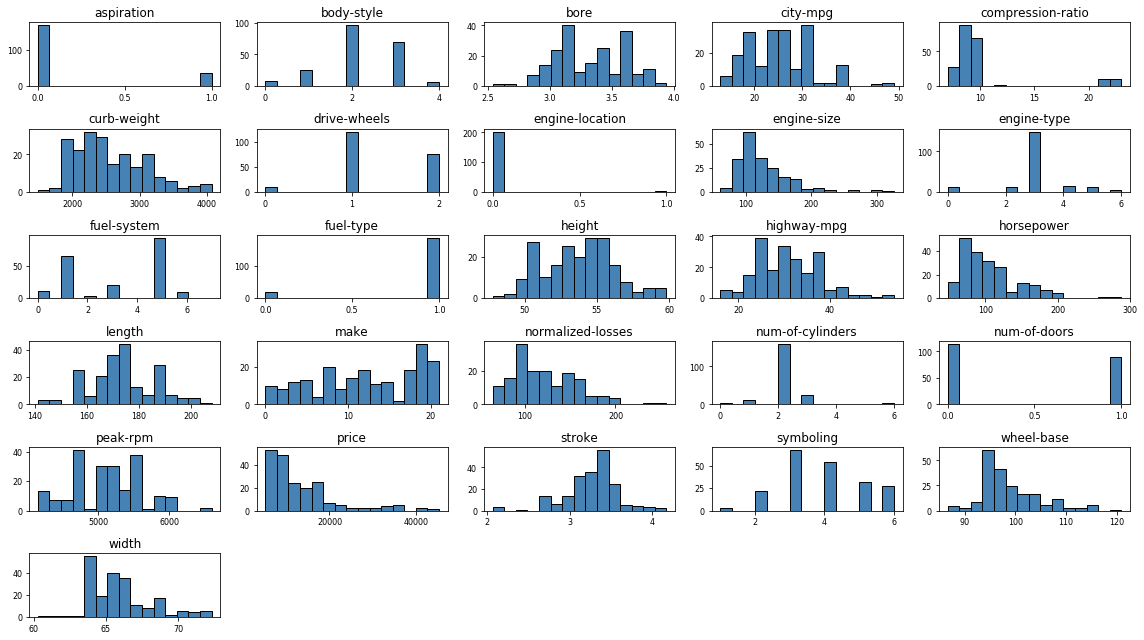

In [21]:
from scripts.dataVisualization import *
show1DHist(data) 

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,outlier
18,121,3,1,0,1,3,1,0,88.4,141.1,60.3,53.2,1488,2,4,61,1,2.91,3.03,9.5,48,5100,47,53,5151,-0.0996843
49,nan,7,1,0,1,2,2,0,102,191.7,70.6,47.8,3950,5,5,326,5,3.54,2.76,11.5,262,5000,13,17,36000,-0.0826888
73,nan,9,1,0,0,2,2,0,120.9,208.1,71.7,56.7,3900,5,0,308,5,3.8,3.35,8,184,4500,14,16,40960,-0.0713464
74,nan,9,1,0,1,0,2,0,112,199.2,72,55.4,3715,5,0,304,5,3.8,3.35,8,184,4500,14,16,45400,-0.068751
69,93,9,0,1,1,0,2,0,106.7,187.5,70.3,54.9,3495,3,1,183,3,3.58,3.64,21.5,123,4350,22,25,28176,-0.066215
128,nan,15,1,0,1,4,2,1,89.5,168.9,65,51.6,2800,4,3,194,5,3.74,2.9,9.5,207,5900,17,25,37028,-0.0542312
70,93,9,0,1,0,2,2,0,115.6,202.6,71.7,56.3,3770,3,1,183,3,3.58,3.64,21.5,123,4350,22,25,31600,-0.048238
68,93,9,0,1,0,1,2,0,110,190.9,70.3,58.7,3750,3,1,183,3,3.58,3.64,21.5,123,4350,22,25,28248,-0.0467112
129,nan,15,1,0,1,3,2,0,98.4,175.7,72.3,50.5,3366,1,0,203,5,3.94,3.11,10,288,5750,17,28,nan,-0.0439674
126,nan,15,1,0,1,0,2,1,89.5,168.9,65,51.6,2756,4,3,194,5,3.74,2.9,9.5,207,5900,17,25,32528,-0.0424739


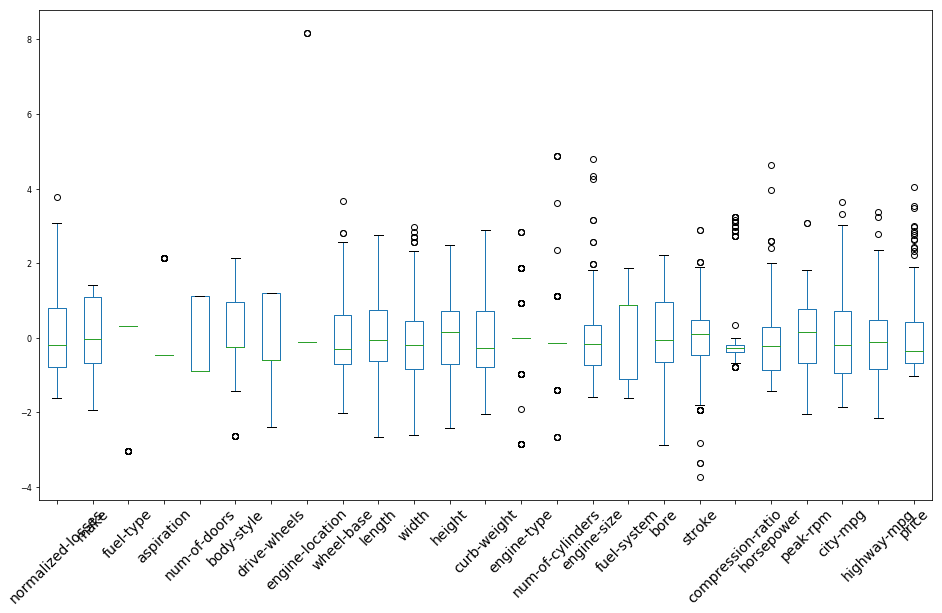

In [22]:
from scripts.outlierDetection import *
outlierDetection(X, features, 10) 

In [23]:
from scripts.localDataOpenMLInterface import *
showTopNSimilarDatasets("datasetSimilarityMatrixNormalized", did, 10) 

    did                       name  similarity                            url
0   328                    bridges       0.717   https://www.openml.org/d/328
1   171              primary-tumor       0.672   https://www.openml.org/d/171
2   372             internet_usage       0.633   https://www.openml.org/d/372
3  1459      artificial-characters       0.622  https://www.openml.org/d/1459
4    41                      glass       0.620    https://www.openml.org/d/41
5   184                      kropt       0.620   https://www.openml.org/d/184
6   327                    bridges       0.614   https://www.openml.org/d/327
7   382          ipums_la_97-small       0.614   https://www.openml.org/d/382
8   133  BNG(glass,nominal,137781)       0.604   https://www.openml.org/d/133
9   307                      vowel       0.584   https://www.openml.org/d/307


Complexity threshold to determine if an algorithm will be run.


In [24]:
comp = 50000000000000

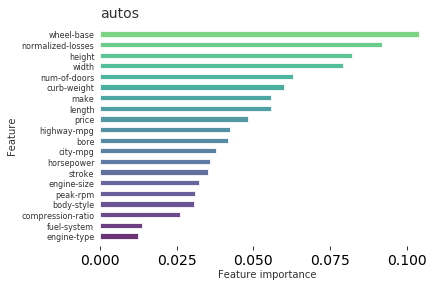

In [25]:
from scripts.featureImportance import *
featureImportance(data) 

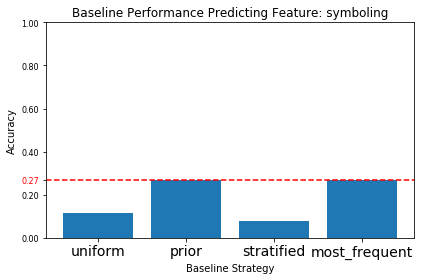

In [26]:
from scripts.baselines import *
maxBaseline = generateBaselines(data, problemType) 

Please run the full notebook then toggle removeOutliers and run this cell and the next to compare the algorithms with and without outliers. 

In [31]:
removeOutliers = True

J48 Median execution time in ms: 10.0
J48 Mean execution time in ms: 480.0


<IPython.core.display.Javascript object>


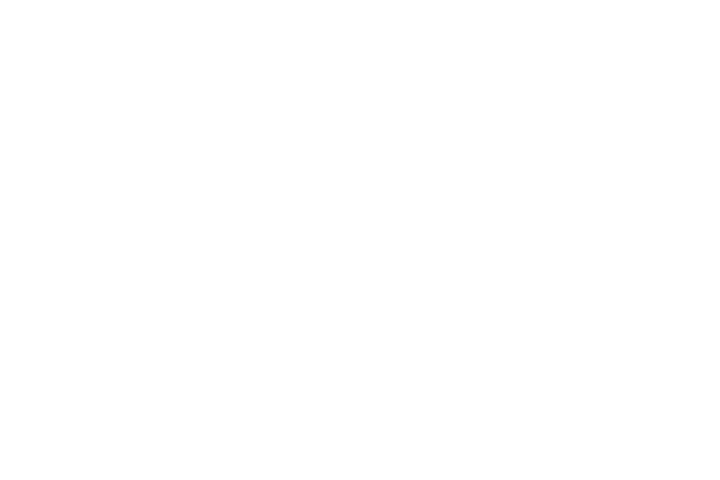

c:\users\hugo\anaconda3\lib\site-packages\openml-0.7.0-py3.5.egg\openml\runs\functions.py:544: UserWarning: Repeat 0 Fold 0: estimator only predicted for 6/7 classes!
  warnings.warn("Repeat %d Fold %d: estimator only predicted for %d/%d classes!" % (rep_no, fold_no, ProbaY.shape[1], len(task.class_labels)))
c:\users\hugo\anaconda3\lib\site-packages\openml-0.7.0-py3.5.egg\openml\runs\functions.py:544: UserWarning: Repeat 0 Fold 1: estimator only predicted for 6/7 classes!
  warnings.warn("Repeat %d Fold %d: estimator only predicted for %d/%d classes!" % (rep_no, fold_no, ProbaY.shape[1], len(task.class_labels)))
c:\users\hugo\anaconda3\lib\site-packages\openml-0.7.0-py3.5.egg\openml\runs\functions.py:544: UserWarning: Repeat 0 Fold 2: estimator only predicted for 6/7 classes!
  warnings.warn("Repeat %d Fold %d: estimator only predicted for %d/%d classes!" % (rep_no, fold_no, ProbaY.shape[1], len(task.class_labels)))
c:\users\hugo\anaconda3\lib\site-packages\openml-0.7.0-py3.5.egg\openm

NaiveBayes Median execution time in ms: 40.0
NaiveBayes Mean execution time in ms: 48.75


<IPython.core.display.Javascript object>


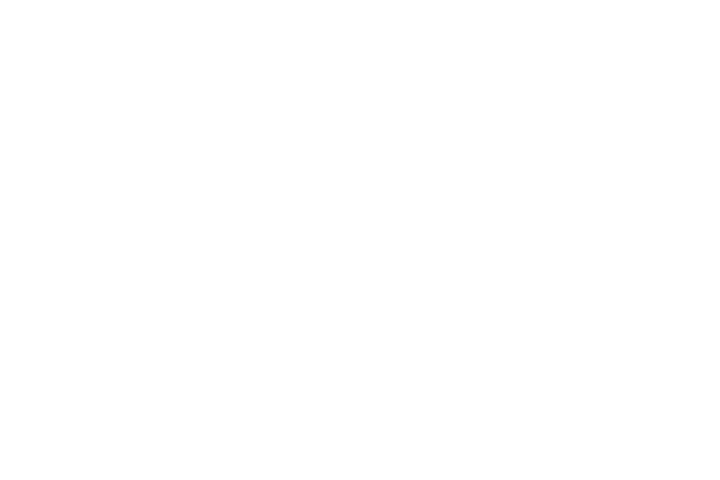

c:\users\hugo\anaconda3\lib\site-packages\openml-0.7.0-py3.5.egg\openml\runs\functions.py:544: UserWarning: Repeat 0 Fold 0: estimator only predicted for 6/7 classes!
  warnings.warn("Repeat %d Fold %d: estimator only predicted for %d/%d classes!" % (rep_no, fold_no, ProbaY.shape[1], len(task.class_labels)))
c:\users\hugo\anaconda3\lib\site-packages\openml-0.7.0-py3.5.egg\openml\runs\functions.py:544: UserWarning: Repeat 0 Fold 1: estimator only predicted for 6/7 classes!
  warnings.warn("Repeat %d Fold %d: estimator only predicted for %d/%d classes!" % (rep_no, fold_no, ProbaY.shape[1], len(task.class_labels)))
c:\users\hugo\anaconda3\lib\site-packages\openml-0.7.0-py3.5.egg\openml\runs\functions.py:544: UserWarning: Repeat 0 Fold 2: estimator only predicted for 6/7 classes!
  warnings.warn("Repeat %d Fold %d: estimator only predicted for %d/%d classes!" % (rep_no, fold_no, ProbaY.shape[1], len(task.class_labels)))
c:\users\hugo\anaconda3\lib\site-packages\openml-0.7.0-py3.5.egg\openm

RandomForest Median execution time in ms: 60.0
RandomForest Mean execution time in ms: 55.45454545454545


<IPython.core.display.Javascript object>


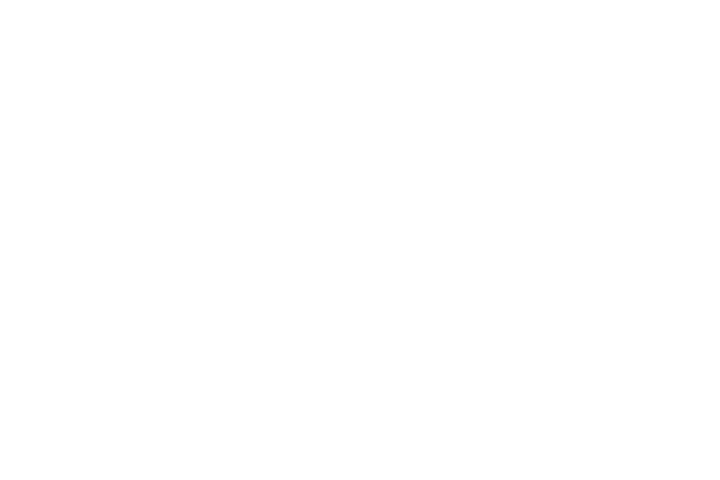

c:\users\hugo\anaconda3\lib\site-packages\openml-0.7.0-py3.5.egg\openml\runs\functions.py:544: UserWarning: Repeat 0 Fold 0: estimator only predicted for 6/7 classes!
  warnings.warn("Repeat %d Fold %d: estimator only predicted for %d/%d classes!" % (rep_no, fold_no, ProbaY.shape[1], len(task.class_labels)))
c:\users\hugo\anaconda3\lib\site-packages\openml-0.7.0-py3.5.egg\openml\runs\functions.py:544: UserWarning: Repeat 0 Fold 1: estimator only predicted for 6/7 classes!
  warnings.warn("Repeat %d Fold %d: estimator only predicted for %d/%d classes!" % (rep_no, fold_no, ProbaY.shape[1], len(task.class_labels)))
c:\users\hugo\anaconda3\lib\site-packages\openml-0.7.0-py3.5.egg\openml\runs\functions.py:544: UserWarning: Repeat 0 Fold 2: estimator only predicted for 6/7 classes!
  warnings.warn("Repeat %d Fold %d: estimator only predicted for %d/%d classes!" % (rep_no, fold_no, ProbaY.shape[1], len(task.class_labels)))
c:\users\hugo\anaconda3\lib\site-packages\openml-0.7.0-py3.5.egg\openm

SVM Median execution time in ms: 80.0
SVM Mean execution time in ms: 74.54545454545455


<IPython.core.display.Javascript object>


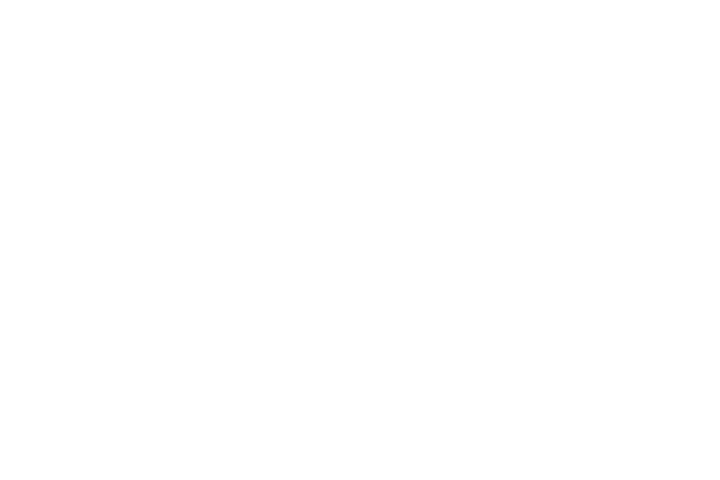

c:\users\hugo\anaconda3\lib\site-packages\openml-0.7.0-py3.5.egg\openml\runs\functions.py:544: UserWarning: Repeat 0 Fold 0: estimator only predicted for 6/7 classes!
  warnings.warn("Repeat %d Fold %d: estimator only predicted for %d/%d classes!" % (rep_no, fold_no, ProbaY.shape[1], len(task.class_labels)))
c:\users\hugo\anaconda3\lib\site-packages\openml-0.7.0-py3.5.egg\openml\runs\functions.py:544: UserWarning: Repeat 0 Fold 1: estimator only predicted for 6/7 classes!
  warnings.warn("Repeat %d Fold %d: estimator only predicted for %d/%d classes!" % (rep_no, fold_no, ProbaY.shape[1], len(task.class_labels)))
c:\users\hugo\anaconda3\lib\site-packages\openml-0.7.0-py3.5.egg\openml\runs\functions.py:544: UserWarning: Repeat 0 Fold 2: estimator only predicted for 6/7 classes!
  warnings.warn("Repeat %d Fold %d: estimator only predicted for %d/%d classes!" % (rep_no, fold_no, ProbaY.shape[1], len(task.class_labels)))
c:\users\hugo\anaconda3\lib\site-packages\openml-0.7.0-py3.5.egg\openm

IBk Median execution time in ms: 20.0
IBk Mean execution time in ms: 20.0


<IPython.core.display.Javascript object>


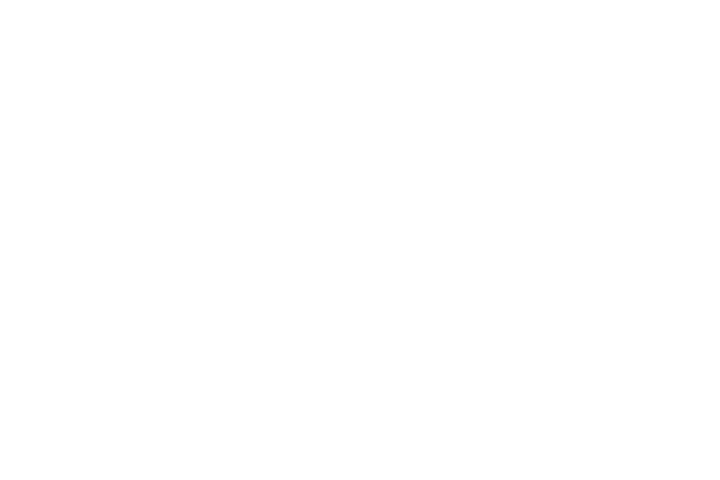

c:\users\hugo\anaconda3\lib\site-packages\openml-0.7.0-py3.5.egg\openml\runs\functions.py:544: UserWarning: Repeat 0 Fold 0: estimator only predicted for 6/7 classes!
  warnings.warn("Repeat %d Fold %d: estimator only predicted for %d/%d classes!" % (rep_no, fold_no, ProbaY.shape[1], len(task.class_labels)))
c:\users\hugo\anaconda3\lib\site-packages\openml-0.7.0-py3.5.egg\openml\runs\functions.py:544: UserWarning: Repeat 0 Fold 1: estimator only predicted for 6/7 classes!
  warnings.warn("Repeat %d Fold %d: estimator only predicted for %d/%d classes!" % (rep_no, fold_no, ProbaY.shape[1], len(task.class_labels)))
c:\users\hugo\anaconda3\lib\site-packages\openml-0.7.0-py3.5.egg\openml\runs\functions.py:544: UserWarning: Repeat 0 Fold 2: estimator only predicted for 6/7 classes!
  warnings.warn("Repeat %d Fold %d: estimator only predicted for %d/%d classes!" % (rep_no, fold_no, ProbaY.shape[1], len(task.class_labels)))
c:\users\hugo\anaconda3\lib\site-packages\openml-0.7.0-py3.5.egg\openm

<IPython.core.display.Javascript object>


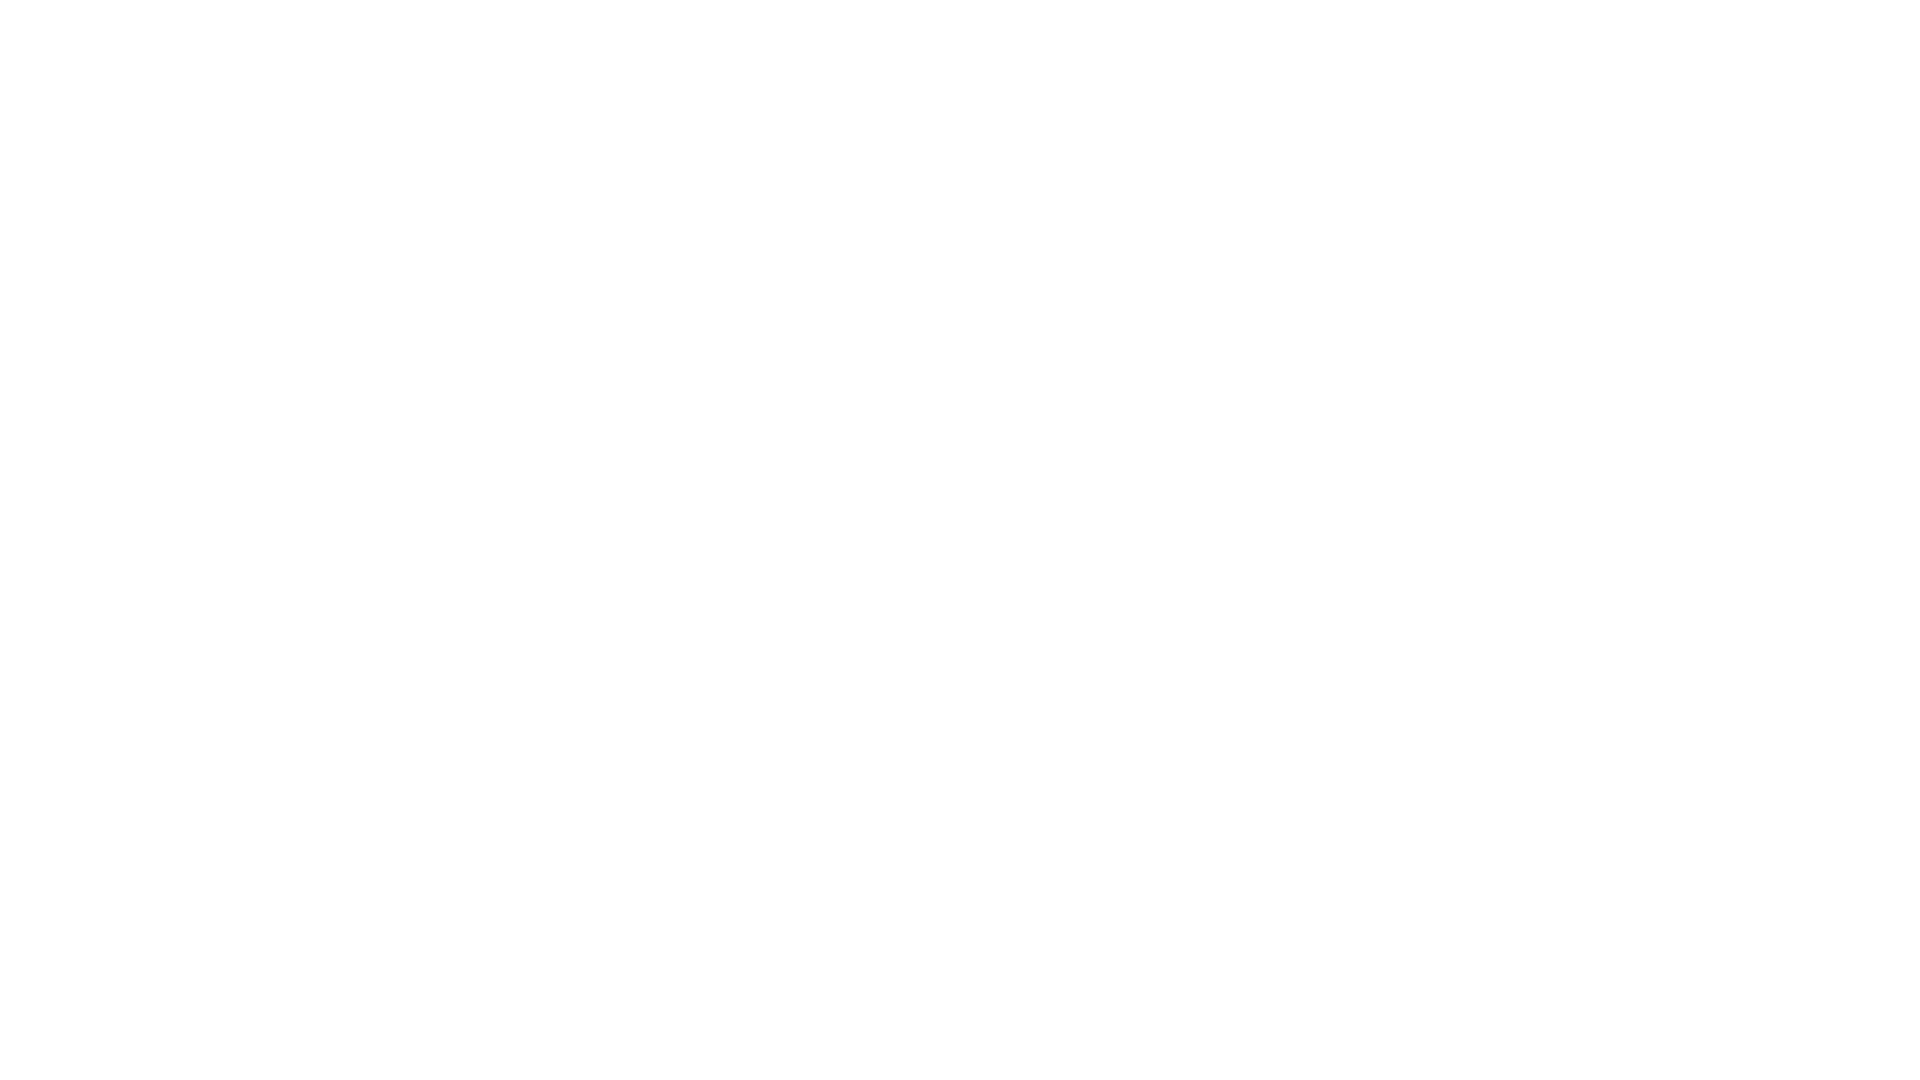

Magenta colour denotes best performing algorithm when this algorithm is trained on different version of the test set.


In [32]:
from scripts.machineLearningAlgorithms import *
settings = runMachineLearningAlgorithms(data, comp, strats, problemType, task, showRuntimePrediction=True, runTPOT=False, removeOutliers=removeOutliers)
plot_alg(data, settings.strats, maxBaseline, problemType) 

c:\users\hugo\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\users\hugo\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\users\hugo\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\users\hugo\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\users\hugo\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\users\hugo\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\users\hugo\anaconda3\lib\site-package

c:\users\hugo\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\users\hugo\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\users\hugo\anaconda3\lib\site-packages\openml-0.7.0-py3.5.egg\openml\runs\functions.py:544: UserWarning: Repeat 0 Fold 6: estimator only predicted for 6/7 classes!
  warnings.warn("Repeat %d Fold %d: estimator only predicted for %d/%d classes!" % (rep_no, fold_no, ProbaY.shape[1], len(task.class_labels)))
c:\users\hugo\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\users\hugo\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\users\hugo\anaconda3\lib\site-packages\sklearn\

<IPython.core.display.Javascript object>


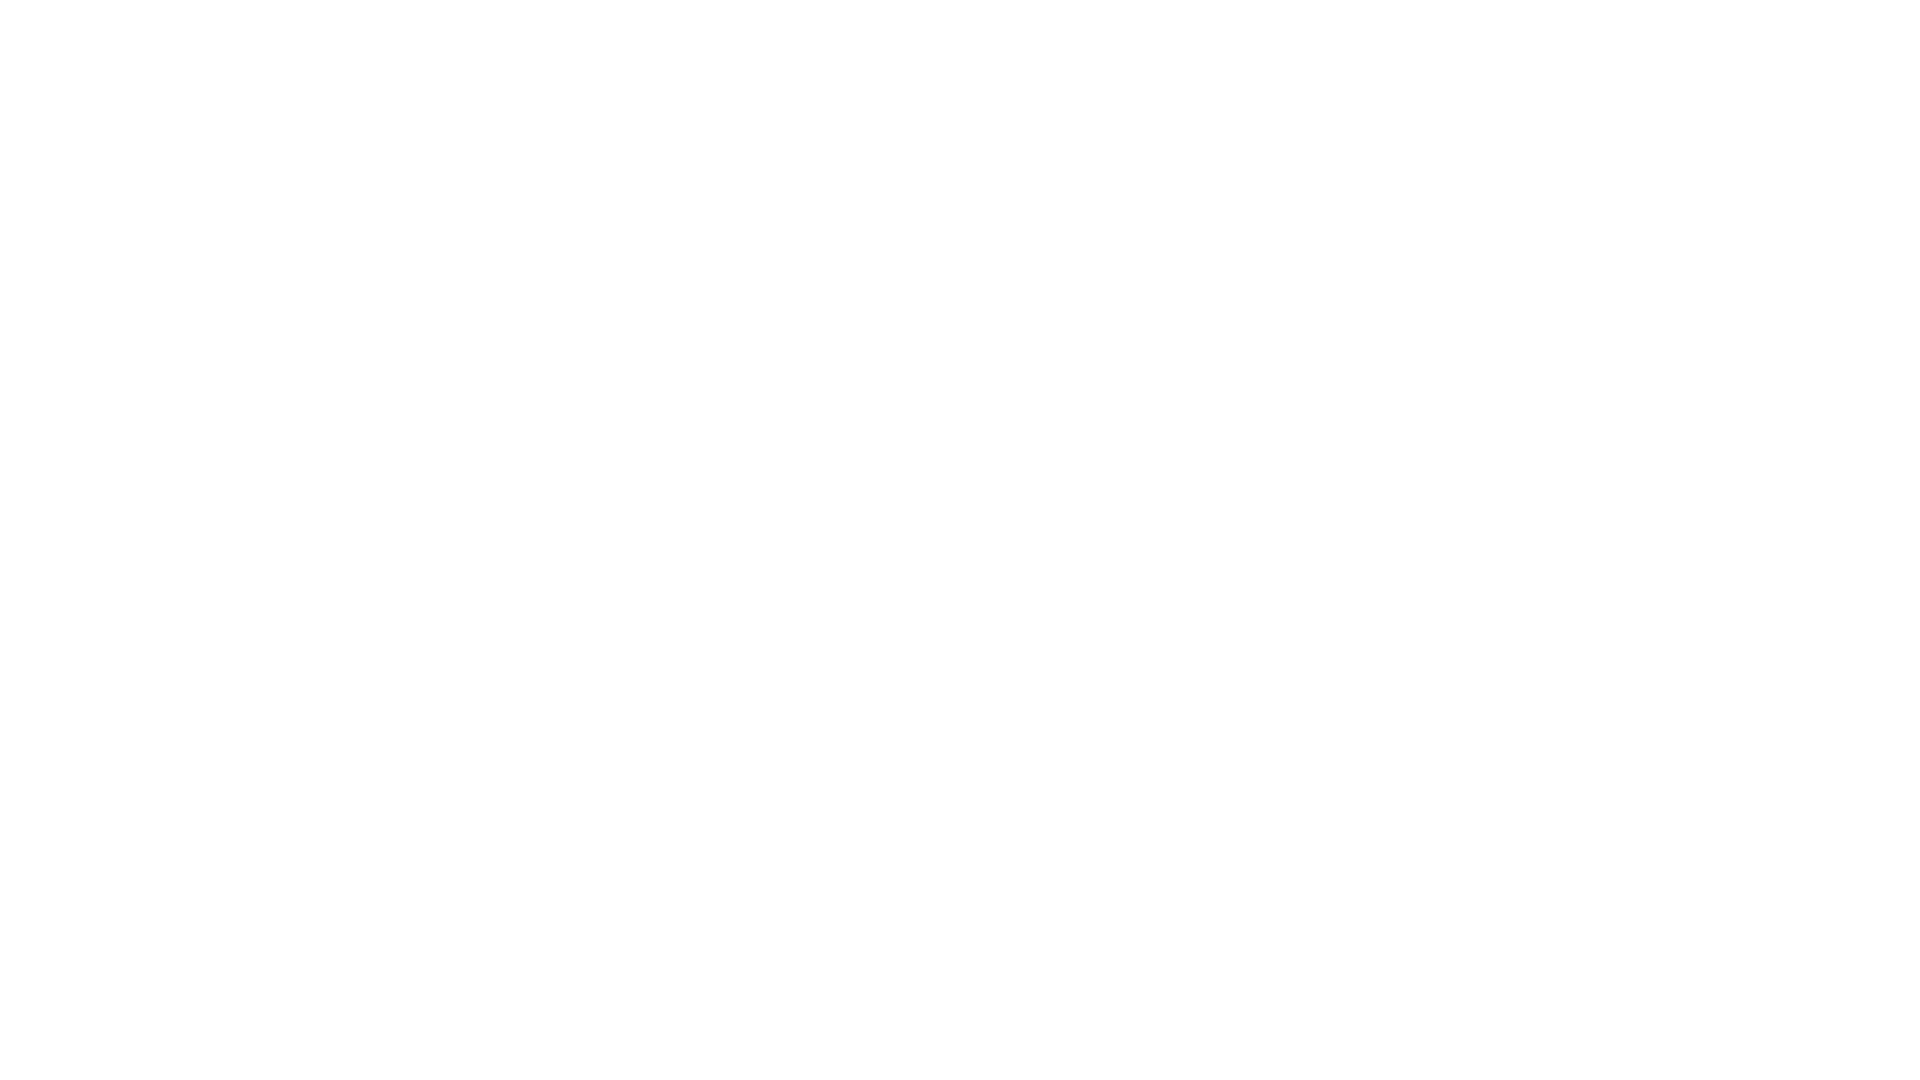

Magenta colour denotes best performing algorithm when this algorithm is trained on different version of the test set.


In [33]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

#Create a custom algorithm by setting classifier and name
#---------------------------------------------------
clf =  QuadraticDiscriminantAnalysis()
name = "CustomAlgorithmQuadraticDiscriminantAnalysis"
#---------------------------------------------------
runMLAlgorithm(estimator=clf, name=name, settings=settings)
plot_alg(data, settings.strats, maxBaseline, problemType) 

<IPython.core.display.Javascript object>


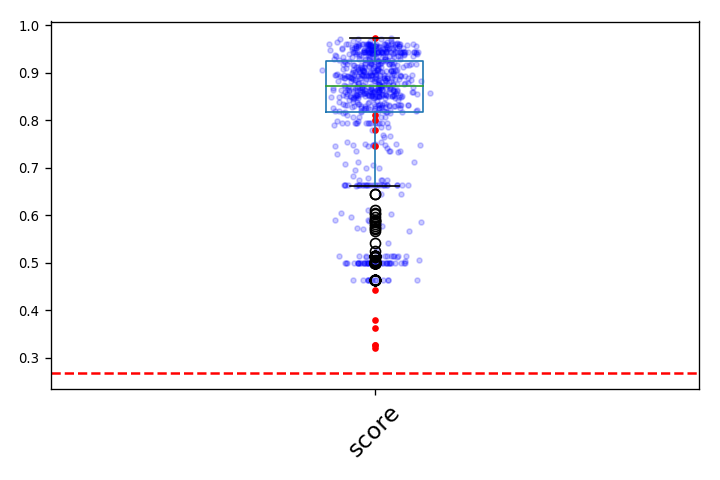

In [34]:
%matplotlib nbagg
from scripts.relativePerformance import * 
showRelativePerformanceBoxplot(scores, topList, settings.strats, maxBaseline) 
#Run this cell again to start the interactive plot